<a href="https://colab.research.google.com/github/FernandoElizarraras7/SIMULACION-II/blob/main/MOVIMIENTO_BROWNIANO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿QUÉ ES EL MOVIMIENTO BROWNIANO?
Es un proceso estocástico que describe el movimiento aleatorio de partículas suspendidas en un fluido, como el agua o el aire, debido a las colisiones con las moléculas del medio. Este fenómeno fue observado por primera vez por el botánico Robert Brown en 1827.

En matemáticas y finanzas, el Movimiento Browniano se utiliza para modelar trayectorias aleatorias y se define como un proceso continuo con las siguientes características:

- Inicio en cero: $W(0) = 0$.
- Incrementos independientes: Los cambios en diferentes intervalos son independientes.
- Incrementos normales: Cada incremento sigue una distribución normal con media $0$ y varianza proporcional al tiempo.
- Trayectoria continua: Aunque es continua, no es diferenciable en ningún punto.

Formalmente, si $W(t)$ es un Movimiento Browniano en el intervalo $[0,T]$, entonces: $$W(t) \sim N(0, t)$$
donde $N(0,t)$ indica una distribución normal con media $0$ y varianza $t$.

Este modelo es ampliamente usado en:
- Física: Para describir el movimiento de partículas.
- Finanzas: En modelos como Black-Scholes para precios de opciones.
- Simulación: Para generar trayectorias aleatorias en intervalos de tiempo.

En la siguiente celda, generaremos una trayectoria de Movimiento Browniano en el intervalo $[0,1]$ y mostraremos un refinamiento para aumentar la precisión.






Valor final en t = 1: 0.7470
Máximo valor alcanzado: 1.0827
Mínimo valor alcanzado: -0.2308
Promedio de la trayectoria: 0.4919
Varianza estimada: 0.1147


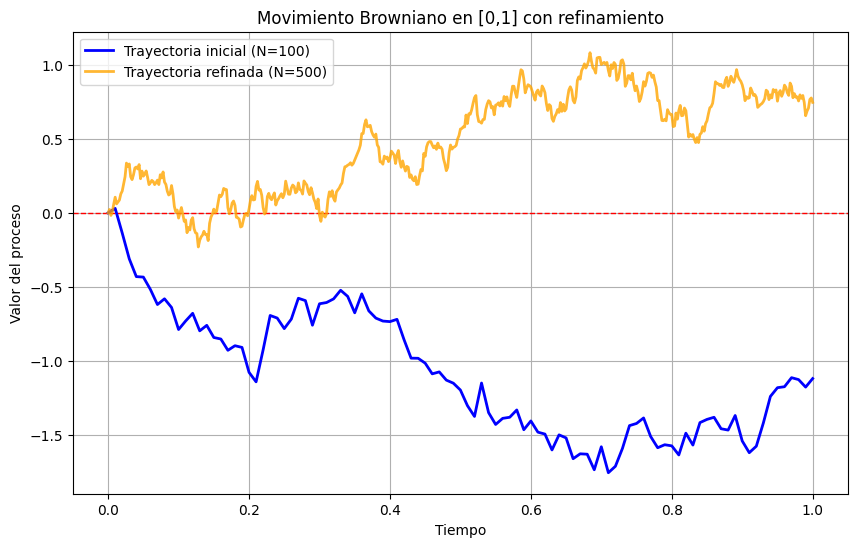

In [15]:
# === Movimiento Browniano ===

import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T = 1.0          # Intervalo [0,1]
N = 100          # Número inicial de pasos
refinamiento = 500  # Número de pasos después del refinamiento

# Función para generar Movimiento Browniano
def movimiento_browniano(T, N):
    dt = T / N
    # Incrementos normales con media 0 y varianza dt
    incrementos = np.random.normal(0, np.sqrt(dt), N)
    trayectoria = np.concatenate(([0], np.cumsum(incrementos)))
    tiempo = np.linspace(0, T, N+1)
    return tiempo, trayectoria

# Trayectoria inicial
tiempo_inicial, trayectoria_inicial = movimiento_browniano(T, N)

# Refinamiento
tiempo_refinado, trayectoria_refinada = movimiento_browniano(T, refinamiento)

# Resultados
print(f"Valor final en t = 1: {trayectoria_refinada[-1]:.4f}")
print(f"Máximo valor alcanzado: {max(trayectoria_refinada):.4f}")
print(f"Mínimo valor alcanzado: {min(trayectoria_refinada):.4f}")
print(f"Promedio de la trayectoria: {np.mean(trayectoria_refinada):.4f}")
print(f"Varianza estimada: {np.var(trayectoria_refinada):.4f}")

# Gráfica
plt.figure(figsize=(10, 6))
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.plot(tiempo_inicial, trayectoria_inicial, label=f'Trayectoria inicial (N={N})', color='blue', linewidth=2)
plt.plot(tiempo_refinado, trayectoria_refinada, label=f'Trayectoria refinada (N={refinamiento})', color='orange', linewidth=2, alpha=0.8)
plt.title('Movimiento Browniano en [0,1] con refinamiento')
plt.xlabel('Tiempo')
plt.ylabel('Valor del proceso')
plt.legend()
plt.grid(True)
plt.show()

## CONCLUSIONES
1. Comportamiento aleatorio y continuo: El Movimiento Browniano genera trayectorias aleatorias que son continuas pero no diferenciables. Esto se observa en la gráfica, donde las fluctuaciones son irregulares y no siguen una tendencia definida.

2. Refinamiento mejora la precisión visual: Al aumentar el número de puntos (refinamiento), la trayectoria se aproxima mejor a la naturaleza continua del proceso. La línea refinada muestra más detalle y menos saltos bruscos que la trayectoria inicial.
3. La varianza calculada sobre la trayectoria completa es menor que $1$ porque incluye todos los puntos de la trayectoria, no del incremento final. Esto incluye valores intermedios que están correlacionados entre sí. Por eso la varianza eees mucho menor de $1$, ya que se está promediando sobre puntos que no son independientes.
4. Importancia del número de simulaciones: Una sola trayectoria no refleja completamente las propiedades estadísticas del Movimiento Browniano. Para validar la teoría, se recomienda realizar múltiples simulaciones y analizar la media y varianza del valor final.

### RECOMENDACIÓN
Para un análisis más completo, se puede:
- Generar varias trayectorias en la misma gráfica para ilustrar la variabilidad.
- Comprobar la varianza del valor final mediante múltiples simulaciones, que debería aproximarse a 1.